# Data Merging

1) Inner Join

2) One to many relationships

3) Merging multiple DataFrames

In [13]:
# https://pandas.pydata.org/docs/reference/api/pandas.read_pickle.html
import pandas as pd

wards = pd.read_pickle('./Data/ward.p')
print(wards.head())

  ward            alderman                          address    zip
0    1  Proco "Joe" Moreno        2058 NORTH WESTERN AVENUE  60647
1    2       Brian Hopkins       1400 NORTH  ASHLAND AVENUE  60622
2    3          Pat Dowell          5046 SOUTH STATE STREET  60609
3    4    William D. Burns  435 EAST 35TH STREET, 1ST FLOOR  60616
4    5  Leslie A. Hairston            2325 EAST 71ST STREET  60649


In [14]:
import pandas as pd

census =  pd.read_pickle('./Data/census.p')
print(census.head())

  ward  pop_2000  pop_2010 change                                  address  \
0    1     52951     56149     6%              2765 WEST SAINT MARY STREET   
1    2     54361     55805     3%                 WM WASTE MANAGEMENT 1500   
2    3     40385     53039    31%                      17 EAST 38TH STREET   
3    4     51953     54589     5%  31ST ST HARBOR BUILDING LAKEFRONT TRAIL   
4    5     55302     51455    -7%  JACKSON PARK LAGOON SOUTH CORNELL DRIVE   

     zip  
0  60647  
1  60622  
2  60653  
3  60653  
4  60637  


### Inner Join

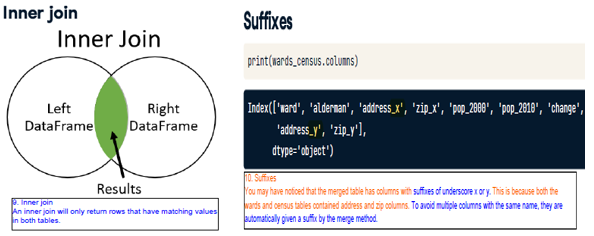

In [15]:
wards_census = wards.merge(census, on='ward')
print(wards_census.head())

  ward            alderman                        address_x  zip_x  pop_2000  \
0    1  Proco "Joe" Moreno        2058 NORTH WESTERN AVENUE  60647     52951   
1    2       Brian Hopkins       1400 NORTH  ASHLAND AVENUE  60622     54361   
2    3          Pat Dowell          5046 SOUTH STATE STREET  60609     40385   
3    4    William D. Burns  435 EAST 35TH STREET, 1ST FLOOR  60616     51953   
4    5  Leslie A. Hairston            2325 EAST 71ST STREET  60649     55302   

   pop_2010 change                                address_y  zip_y  
0     56149     6%              2765 WEST SAINT MARY STREET  60647  
1     55805     3%                 WM WASTE MANAGEMENT 1500  60622  
2     53039    31%                      17 EAST 38TH STREET  60653  
3     54589     5%  31ST ST HARBOR BUILDING LAKEFRONT TRAIL  60653  
4     51455    -7%  JACKSON PARK LAGOON SOUTH CORNELL DRIVE  60637  


In [16]:
wards_census.shape

(50, 9)

In [17]:
# Suffixes

wards_census = wards.merge(census, on='ward', suffixes = ('_ward', '_cen'))
print(wards_census.head())

  ward            alderman                     address_ward zip_ward  \
0    1  Proco "Joe" Moreno        2058 NORTH WESTERN AVENUE    60647   
1    2       Brian Hopkins       1400 NORTH  ASHLAND AVENUE    60622   
2    3          Pat Dowell          5046 SOUTH STATE STREET    60609   
3    4    William D. Burns  435 EAST 35TH STREET, 1ST FLOOR    60616   
4    5  Leslie A. Hairston            2325 EAST 71ST STREET    60649   

   pop_2000  pop_2010 change                              address_cen zip_cen  
0     52951     56149     6%              2765 WEST SAINT MARY STREET   60647  
1     54361     55805     3%                 WM WASTE MANAGEMENT 1500   60622  
2     40385     53039    31%                      17 EAST 38TH STREET   60653  
3     51953     54589     5%  31ST ST HARBOR BUILDING LAKEFRONT TRAIL   60653  
4     55302     51455    -7%  JACKSON PARK LAGOON SOUTH CORNELL DRIVE   60637  


### One to many relationships

In [18]:
# wards & census was 1-1 linked

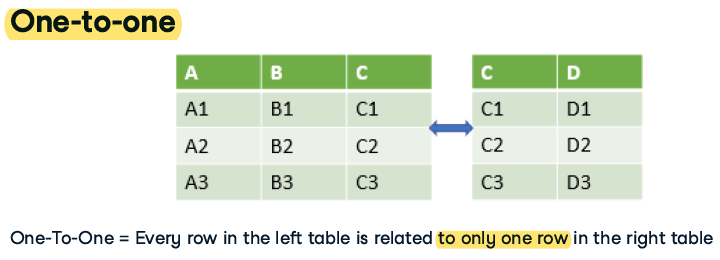

In [19]:
# One to many relationships

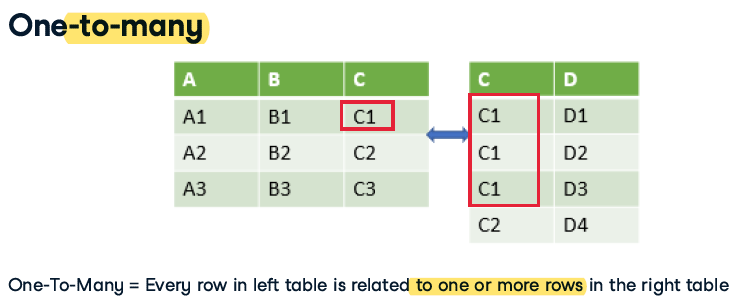

In [20]:
import pandas as pd

licenses = pd.read_pickle('./Data/licenses.p')
print(licenses.head())
print(licenses.shape)

  account ward  aid                   business               address    zip
0  307071    3  743       REGGIE'S BAR & GRILL       2105 S STATE ST  60616
1      10   10  829                 HONEYBEERS   13200 S HOUSTON AVE  60633
2   10002   14  775                CELINA DELI     5089 S ARCHER AVE  60632
3   10005   12  NaN  KRAFT FOODS NORTH AMERICA        2005 W 43RD ST  60609
4   10044   44  638  NEYBOUR'S TAVERN & GRILLE  3651 N SOUTHPORT AVE  60613
(10000, 6)


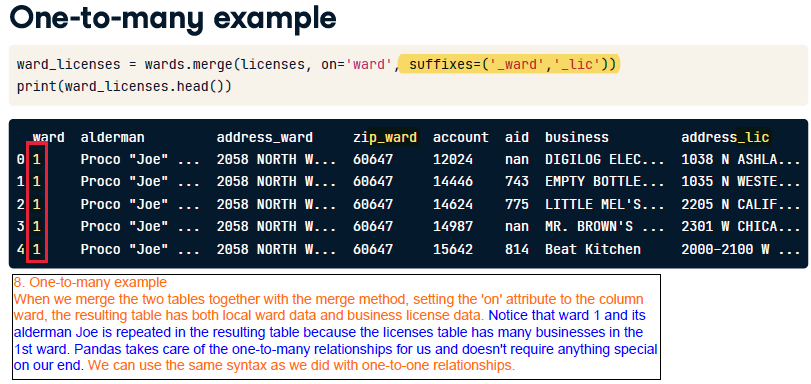

In [21]:
ward_licenses = wards.merge(licenses, on='ward', suffixes=('_ward', '_lic'))
print(ward_licenses.head())

  ward            alderman               address_ward zip_ward account  aid  \
0    1  Proco "Joe" Moreno  2058 NORTH WESTERN AVENUE    60647   12024  NaN   
1    1  Proco "Joe" Moreno  2058 NORTH WESTERN AVENUE    60647   14446  743   
2    1  Proco "Joe" Moreno  2058 NORTH WESTERN AVENUE    60647   14624  775   
3    1  Proco "Joe" Moreno  2058 NORTH WESTERN AVENUE    60647   14987  NaN   
4    1  Proco "Joe" Moreno  2058 NORTH WESTERN AVENUE    60647   15642  814   

               business              address_lic zip_lic  
0   DIGILOG ELECTRONICS       1038 N ASHLAND AVE   60622  
1      EMPTY BOTTLE INC   1035 N WESTERN AVE 1ST   60622  
2  LITTLE MEL'S HOT DOG    2205 N CALIFORNIA AVE   60647  
3    MR. BROWN'S LOUNGE   2301 W CHICAGO AVE 1ST   60622  
4          Beat Kitchen  2000-2100 W DIVISION ST   60622  


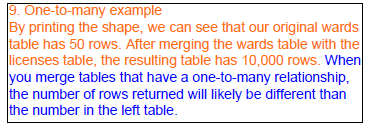

### Merging Multiple DataFrames

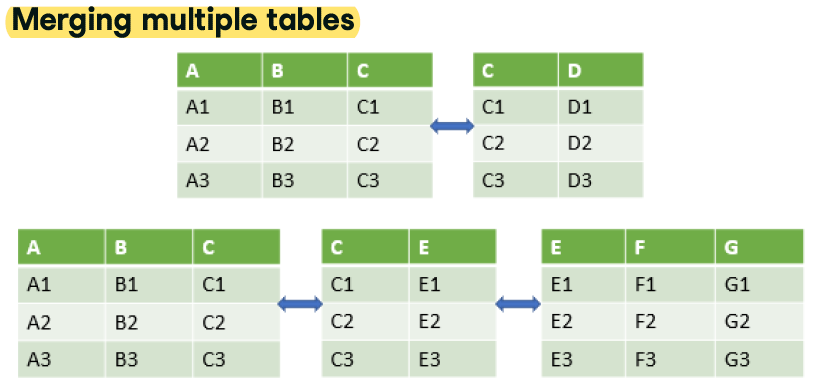

In [22]:
# We are missing "grants.p" file

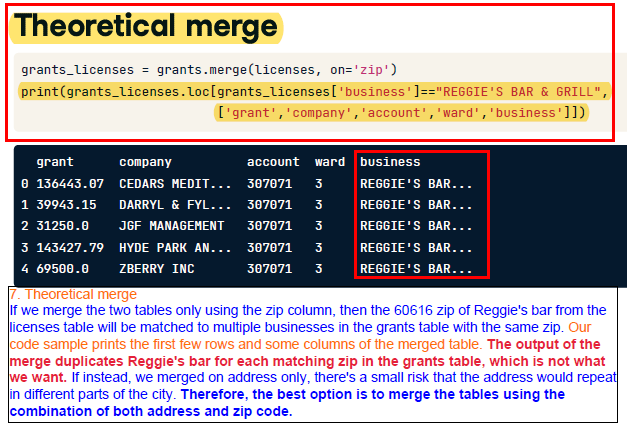

In [23]:
wards.merge(licenses, on = ['address', 'zip'])

,ward_x,alderman,address,zip,account,ward_y,aid,business


In [24]:
# No merges because there is no overlap of address & zip in their databases.
# Need to find the data where they have a overlap & continue the course!

In [32]:
census_licenses_ward = wards.merge(census, on = ['zip'])\
                        .merge(licenses, on = 'ward')
print(census_licenses_ward.head())

MergeError: Merge keys are not unique in either left or right dataset; not a one-to-one merge

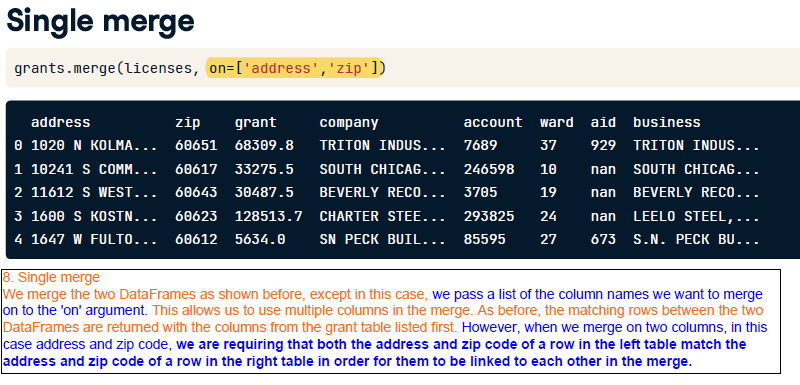

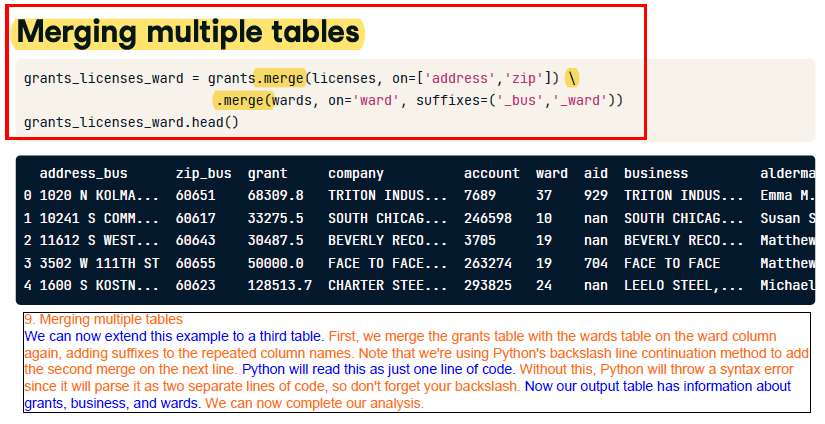

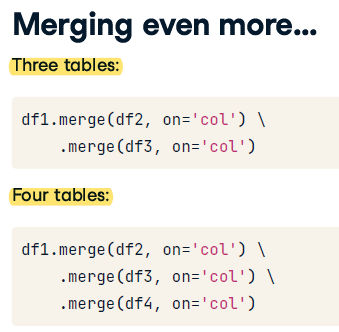